# Sensor Calibrations for proximity sensors

**Manufacturer:** Sharp  
**Product name:** GP2Y0A51SK0F  
**Input Voltage:** ~5V  

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
"""Reads in all the random numbers from a given path."""
def read_data(path):
    data = open(path, "r")
    numbers = list()
    for i, line in enumerate(data):
        if i == 0:
            numbers.append(line.split(", "))
        else:
            numbers.append(list(map(int, line.split(","))))

    return numbers

Distance (cm): [ 0  2  4  5  6  8 10 13 15 17 20 23 26 30]
Left: [1.04736328 1.95776367 1.20849609 1.03125    0.86206055 0.66870117
 0.53979492 0.38269043 0.29003906 0.20141602 0.0604248  0.0201416
 0.01933594 0.0201416 ]
Front: [0.88623047 2.17529297 1.2890625  1.04736328 0.90234375 0.68481445
 0.53979492 0.33837891 0.2175293  0.11682129 0.05639648 0.0402832
 0.02980957 0.02094727]
Right: [0.88623047 2.09472656 1.20849609 1.00708008 0.87011719 0.66870117
 0.54382324 0.40686035 0.33837891 0.24572754 0.12084961 0.03222656
 0.01853027 0.01853027]


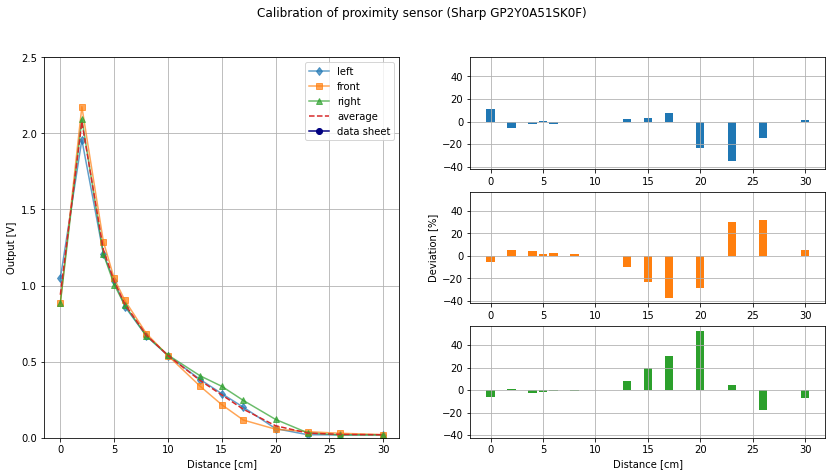

In [21]:
path = "measurements.csv"
content = read_data(path)

Q = 3.3 / 2**12  # Quantization

# Absolute Values
numbers = np.array(content[1:])
distances, left, front, right = numbers[:,0], numbers[:,1], numbers[:,2], numbers[:,3]
left  = left *  Q
front = front * Q
right = right * Q


average = np.average(numbers[:,1:]*Q, axis=1)
print(f"{content[0][0]}: {distances}")
print(f"{content[0][1]}: {left}")
print(f"{content[0][2]}: {front}")
print(f"{content[0][3].strip()}: {right}")

# Calculate Deviations in %
dev_left  = (left - average) / average * 100
dev_front = (front - average) / average * 100
dev_right = (right - average) / average * 100

# Visualize
#fig, ax = plt.subplots(1,2, figsize=(14,7))
fig = plt.figure(figsize=(14,7))
ax1, ax2, ax3, ax4 = fig.add_subplot(1,2,1), fig.add_subplot(3,2,2), fig.add_subplot(3,2,4), fig.add_subplot(3,2,6)
fig.suptitle("Calibration of proximity sensor (Sharp GP2Y0A51SK0F)")
ax1.set_xlabel("Distance [cm]")
ax1.set_ylabel("Output [V]")
ax1.set_ylim([0,2.5])
ax1.plot(distances, left,  marker="d", alpha=0.7, label="left")
ax1.plot(distances, front, marker="s", alpha=0.7, label="front")
ax1.plot(distances, right, marker="^", alpha=0.7, label="right")
ax1.plot(distances, average, ls="--", label="average")
ax1.plot(np.NaN, np.NaN, marker="o", label="data sheet", c="navy")
ax1.legend()
ax4.set_xlabel("Distance [cm]")
ax3.set_ylabel("Deviation [%]")
ax2.bar(distances, dev_left,  alpha=1, label="left")
ax2.bar(distances, dev_front, alpha=0, label="front")
ax2.bar(distances, dev_right, alpha=0, label="right")
ax3.bar(distances, dev_left,  alpha=0, label="left")
ax3.bar(distances, dev_front, alpha=1, label="front")
ax3.bar(distances, dev_right, alpha=0, label="right")
ax4.bar(distances, dev_left,  alpha=0, label="left")
ax4.bar(distances, dev_front, alpha=0, label="front")
ax4.bar(distances, dev_right, alpha=1, label="right")
for ax in [ax1, ax2, ax3, ax4]: ax.grid()


plt.savefig("Calibration_proximity_sensor.png")